In [210]:
import matplotlib.pyplot as plt
import numpy as np

In [346]:
t = np.linspace(0, 10, 150)
f = 1
Y = np.array([np.sin(2*np.pi*f*t)*a for a in np.linspace(0.1, 1, 10)])
Y.shape

(10, 150)

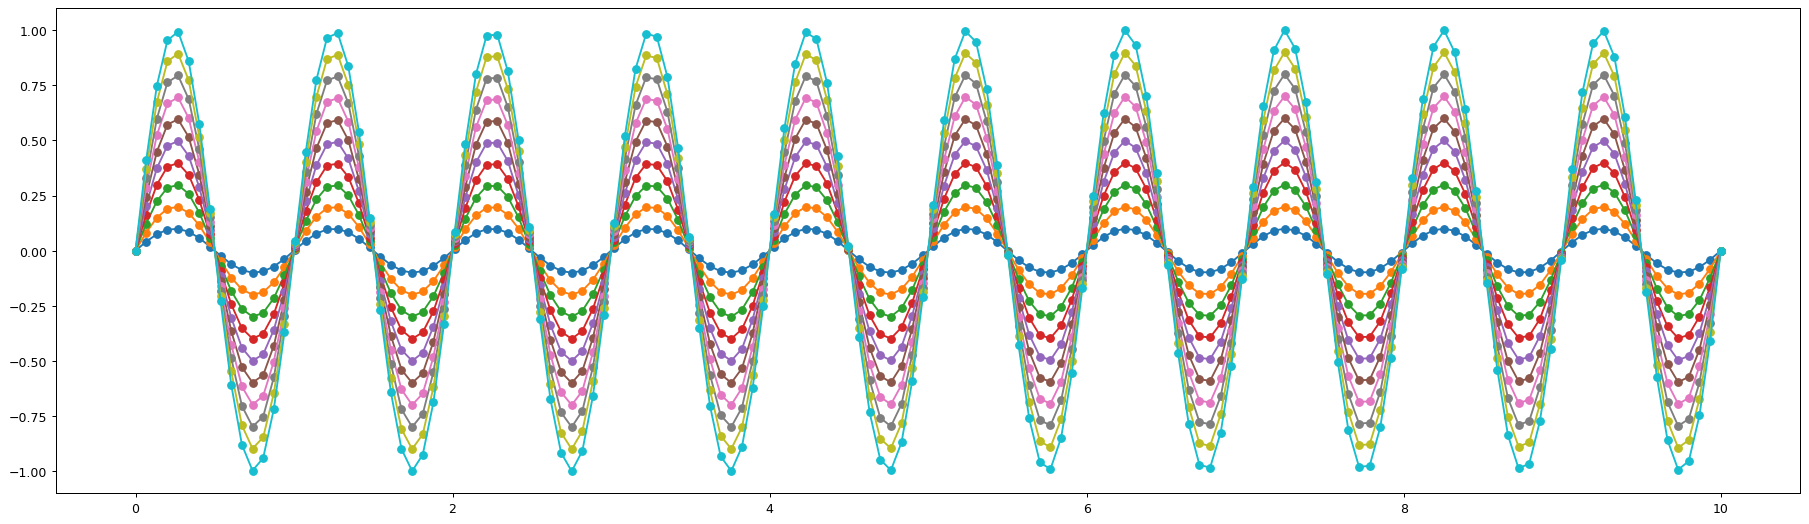

In [347]:
plt.figure(figsize=(25, 7), dpi=90)

[plt.plot(t, y, '-o') for y in Y];

In [348]:
def tobits(x, n, in_min=None, in_max=None):
    
    if in_min is None:
        in_min = x.min()
    if in_max is None:
        in_max = x.max()
        
    out_min = 0
    out_max = (2**n)-1
        
    # m = np.array((x - x.min()) * ((2**n)-1) / (x.max() - x.min()))
    m = np.array((x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min)
    
    return np.trunc(m).astype(np.int32)

In [409]:

def shadowns(Y):
    
    b = 5
    nb = 1000
    v = 1
    f = 0.1

    grid = np.zeros((nb, 2**b))

    for y in Y:

        x = range(len(y))
        x_ = np.linspace(x[0], x[-1], nb)
        y_ = np.interp(x_, x, y)

        y_map = tobits(y_, b, -2, 2)

        grid[range(y_map.size), y_map] += (1/Y.shape[0])
        grid[range(y_map.size), y_map+v] += (1/Y.shape[0])*f
        grid[range(y_map.size), y_map-v] += (1/Y.shape[0])*f
        grid[np.roll(range(y_map.size), v), y_map] += (1/Y.shape[0])*f
        grid[np.roll(range(y_map.size), -v), y_map] += (1/Y.shape[0])*f

        grid[range(y_map.size), y_map+(2*v)] += (1/Y.shape[0])*f
        grid[range(y_map.size), y_map-(2*v)] += (1/Y.shape[0])*f
        grid[np.roll(range(y_map.size), (2*v)), y_map] += (1/Y.shape[0])*f
        grid[np.roll(range(y_map.size), -(2*v)), y_map] += (1/Y.shape[0])*f

    fig = plt.figure(figsize=(25, 7), dpi=90)
    
    return grid.T

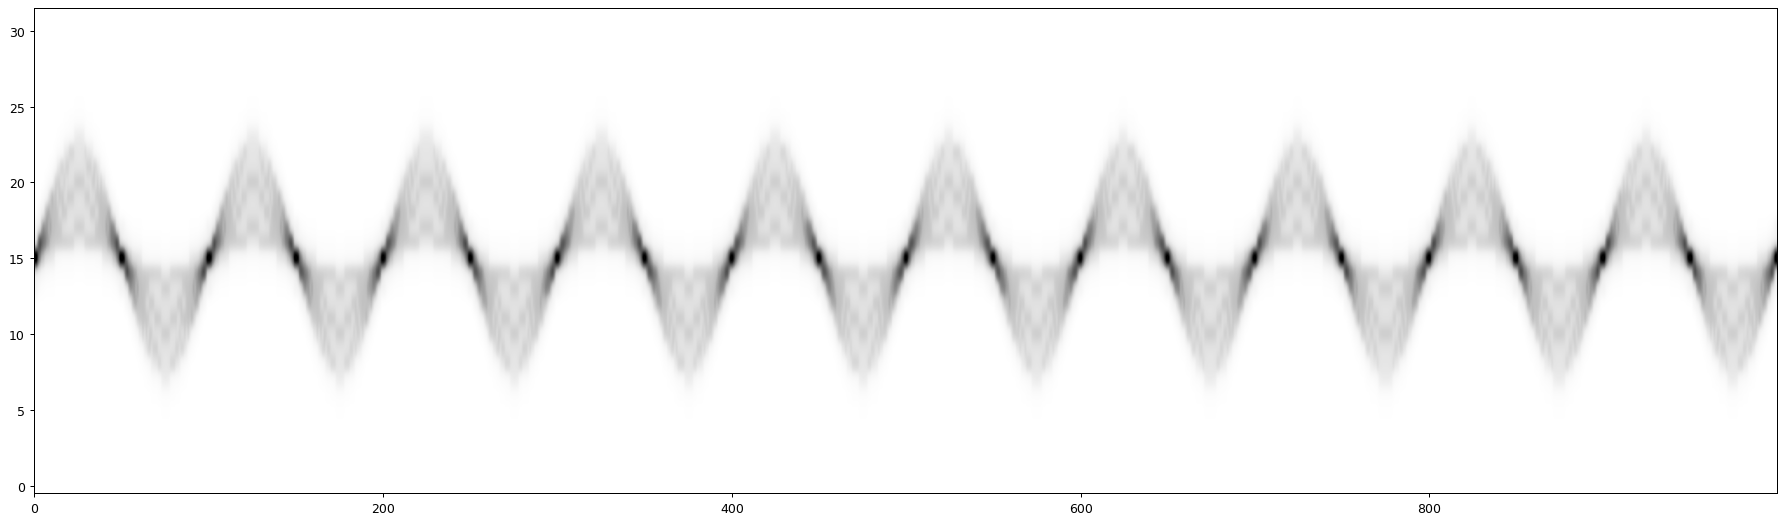

In [412]:
plt.imshow(shadowns(Y), cmap='Greys', interpolation='gaussian', vmin=0, vmax=1, aspect='auto', origin='lower')

In [333]:
y_map.shape, grid.shape

((1000,), (1000, 33))

In [235]:
y.shape, y_.shape

((150,), (50,))

In [336]:
2**5

32

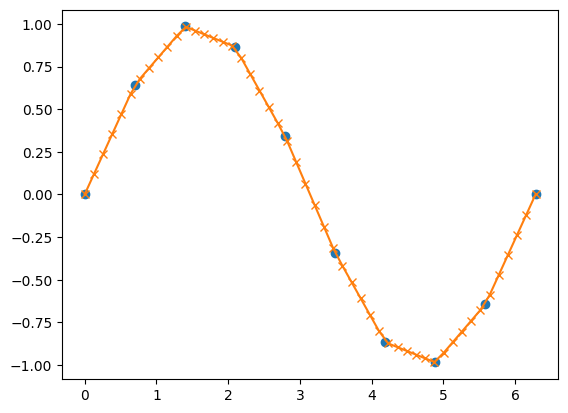

In [203]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)


plt.plot(x, y, 'o')
plt.plot(xvals, yinterp, '-x')
plt.show()

In [364]:
np.roll(range(y_map.size), 1)

array([999,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17